<a href="https://colab.research.google.com/github/kongqiahaha/kongqi/blob/master/deeplearning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#数据读取及库的引入

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as ke
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from skimage.transform import resize
import os

In [0]:
Y=pd.read_csv("/content/drive/My Drive/data/deeplearning test/头部ct数据/labels.csv",usecols=[1])

In [0]:
Y=np.array(Y)

In [27]:
Y.shape

(200, 1)

(957, 821, 3)


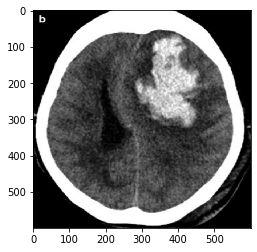

In [28]:
x = plt.imread("/content/drive/My Drive/data/deeplearning test/头部ct数据/head_ct/head_ct/000.png")
print(x.shape)
x=resize(x,(600,600,3))
x.shape
plt.imshow(x)

In [29]:
x=[]
directory_name="/content/drive/My Drive/data/deeplearning test/头部ct数据/head_ct/head_ct"
for filename in os.listdir(directory_name):
  image=plt.imread(directory_name+"/"+filename)
  image=resize(image,(600,600,3))
  x.append(image)
x=np.array(x)
x.shape

(200, 600, 600, 3)

In [0]:
def mix(x,y):
  m=x.shape[0]
  print(m)
  permutation = list(np.random.permutation(m))
  shuffled_x = x[permutation,:]
  shuffled_y = y[permutation].reshape((m,1))
  return shuffled_x,shuffled_y

In [31]:
x,y=mix(x,Y)
x=x/255
x_train=x[:120]
y_train=y[:120]
x_test=x[120:]
y_test=y[120:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)

200
(120, 600, 600, 3)
(120, 1)
(80, 600, 600, 3)
(80, 1)
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


# 单层神经网络(keras)

In [32]:
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=(600,600,3)))
model.add(ke.layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1080000)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1080001   
Total params: 1,080,001
Trainable params: 1,080,001
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train,y_train,epochs=50)

Train on 120 samples
Epoch 1/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6693 - accuracy: 0.5583
Epoch 2/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.6486 - accuracy: 0.5917
Epoch 3/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.5657 - accuracy: 0.6667
Epoch 4/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.5364 - accuracy: 0.7583
Epoch 5/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.5194 - accuracy: 0.7250
Epoch 6/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.4983 - accuracy: 0.7917
Epoch 7/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.4724 - accuracy: 0.7833
Epoch 8/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.4592 - accuracy: 0.8000
Epoch 9/50
120/120 [==============================] - 0s 3ms/sample - loss: 0.4393 - accuracy: 0.8250
Epoch 10/50
120/120 [==============================] - 0s 3ms

In [34]:
model.evaluate(x_test,y_test)

80/80 [==============================] - 0s 3ms/sample - loss: 0.6409 - accuracy: 0.6625


[0.6408818483352661, 0.6625]

In [35]:
print(str(preds[0]))
print(str(preds[1]))

0.8714812278747559
0.725


#深层神经网络

In [36]:
model1=ke.Sequential()
model1.add(ke.layers.Flatten(input_shape=(600,600,3)))
model1.add(ke.layers.Dense(10,activation="relu"))
model1.add(ke.layers.Dense(10,activation="relu"))
model1.add(ke.layers.Dense(10,activation="relu"))
model1.add(ke.layers.Dense(1,activation="sigmoid"))
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1080000)           0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10800010  
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 10,800,241
Trainable params: 10,800,241
Non-trainable params: 0
_________________________________________________________________


In [37]:
model1.fit(x_train,y_train,epochs=50)

Train on 120 samples
Epoch 1/50
120/120 [==============================] - 1s 9ms/sample - loss: 0.7201 - accuracy: 0.4667
Epoch 2/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6894 - accuracy: 0.4917
Epoch 3/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6797 - accuracy: 0.5667
Epoch 4/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6716 - accuracy: 0.5083
Epoch 5/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6644 - accuracy: 0.6500
Epoch 6/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6569 - accuracy: 0.7500
Epoch 7/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6414 - accuracy: 0.5917
Epoch 8/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6297 - accuracy: 0.6750
Epoch 9/50
120/120 [==============================] - 1s 6ms/sample - loss: 0.6240 - accuracy: 0.7417
Epoch 10/50
120/120 [==============================] - 1s 6ms

In [38]:
preds1=model1.evaluate(x_test,y_test)

80/80 [==============================] - 0s 3ms/sample - loss: 0.7024 - accuracy: 0.7250


In [39]:
print(str(preds1[0]))
print(str(preds1[1]))

0.7024089336395264
0.725


#卷积神经网络

In [0]:
model2=ke.Sequential()
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(8,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(16,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.Flatten())
model2.add(ke.layers.Dense(1,activation="sigmoid"))
model2.compile(optimizer=ke.optimizers.Adam(epsilon=1e-08),loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
model2.fit(x_train,y_train,batch_size=16,epochs=15)

Train on 120 samples
Epoch 1/15
120/120 [==============================] - 31s 262ms/sample - loss: 0.7814 - accuracy: 0.9167
Epoch 2/15
120/120 [==============================] - 32s 264ms/sample - loss: 1.2635 - accuracy: 0.8333
Epoch 3/15
120/120 [==============================] - 31s 261ms/sample - loss: 1.8034 - accuracy: 0.8417
Epoch 4/15
120/120 [==============================] - 31s 261ms/sample - loss: 1.2635 - accuracy: 0.8583
Epoch 5/15
120/120 [==============================] - 31s 262ms/sample - loss: 0.6525 - accuracy: 0.9000
Epoch 6/15
120/120 [==============================] - 31s 262ms/sample - loss: 0.6383 - accuracy: 0.9333
Epoch 7/15
120/120 [==============================] - 31s 261ms/sample - loss: 0.0158 - accuracy: 0.9917
Epoch 8/15
120/120 [==============================] - 32s 263ms/sample - loss: 0.0656 - accuracy: 0.9833
Epoch 9/15
120/120 [==============================] - 31s 261ms/sample - loss: 0.0322 - accuracy: 0.9917
Epoch 10/15
120/120 [=============

In [44]:
preds2=model2.evaluate(x_test,y_test)

80/80 [==============================] - 7s 93ms/sample - loss: 1.6597 - accuracy: 0.4625


In [45]:
print(str(preds2[0]))
print(str(preds2[1]))

1.6597140312194825
0.4625


#transfer learning